In [36]:
from bloom import BloomFilter, CustomBloomFilterHashFunctions
from benchmark_bloom import generate_random_dna_sequences, generate_random_words, benchmark_false_positive_rate, random_string
import matplotlib.pyplot as plt

Hash Function 1: Chi2 = 7.55, p-value = 0.58
Hash Function 2: Chi2 = 1.38, p-value = 1.00
Hash Function 3: Chi2 = 2.81, p-value = 0.97
Hash Function 4: Chi2 = 4.24, p-value = 0.89
Hash Function 5: Chi2 = 3.77, p-value = 0.93
Hash Function 6: Chi2 = 2.57, p-value = 0.98
Hash Function 7: Chi2 = 2.44, p-value = 0.98
Hash Function 8: Chi2 = 3.79, p-value = 0.92
Hash Function 9: Chi2 = 3.79, p-value = 0.92
Hash Function 10: Chi2 = 4.47, p-value = 0.88


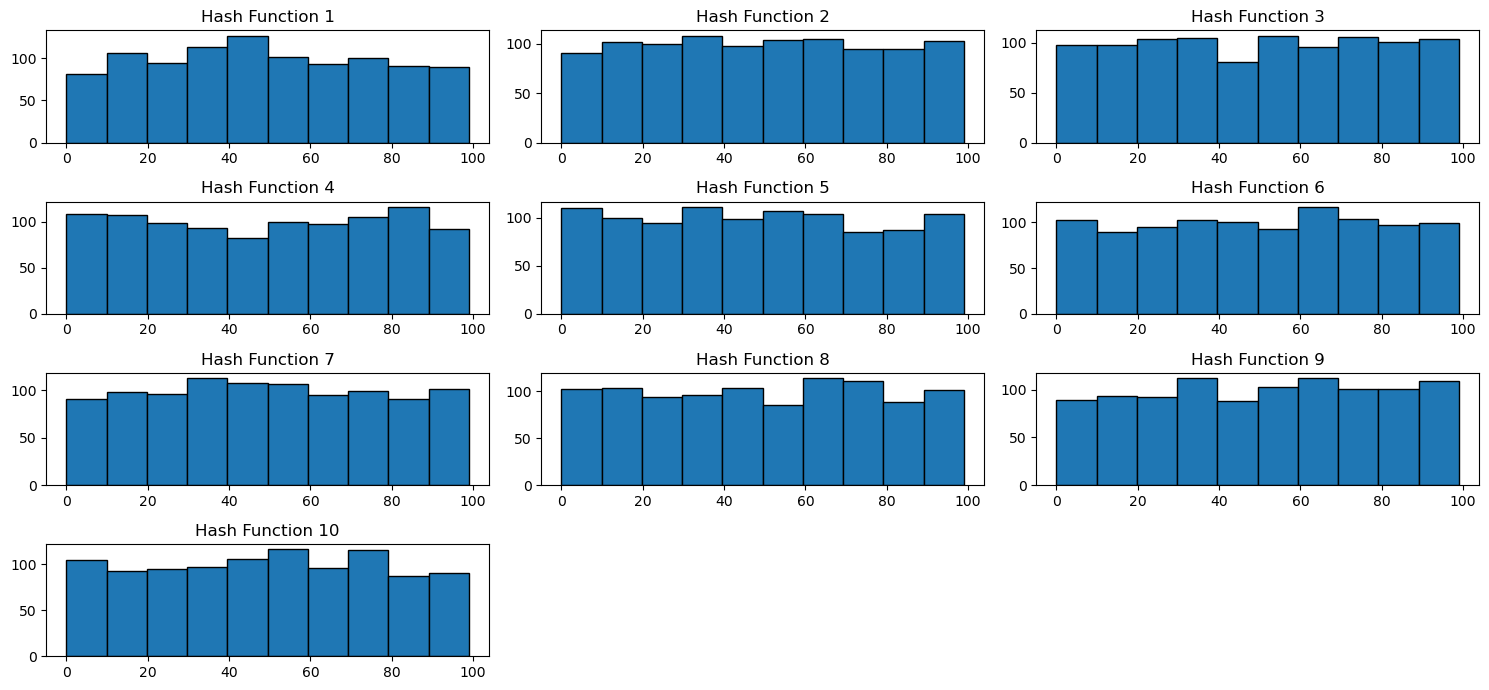

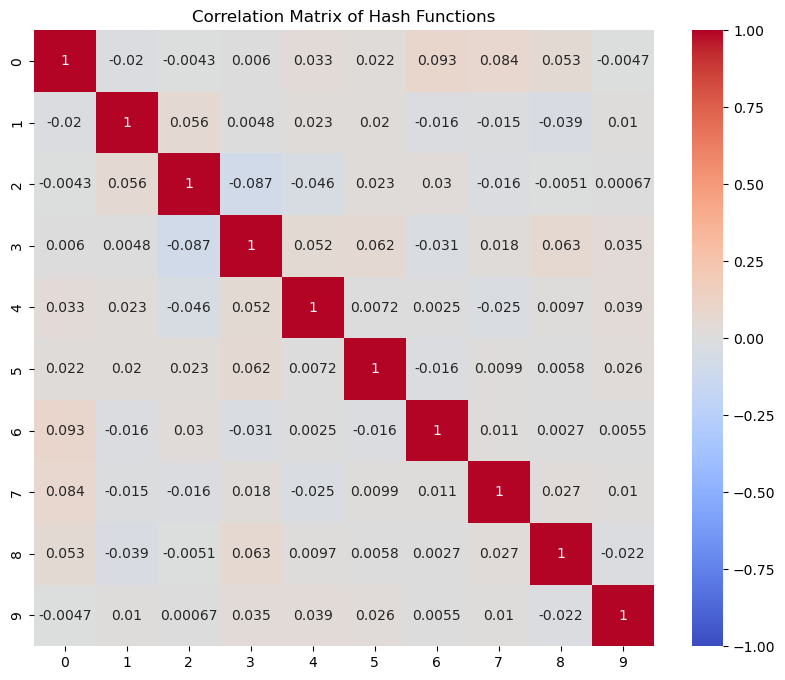

In [39]:
## Evaluate Uniformity of hash functions

bf_size = 100

num_hashes = 10

# generate random string
random_data = [random_string() for _ in range(1000)]

hashes = CustomBloomFilterHashFunctions(bf_size, num_hashes)



hashes.check_uniformity_with_chisquare(random_data)


In [31]:
# Test bloom filter with DNA data
dna_data = generate_random_dna_sequences(10, 10)
look_up_data = generate_random_dna_sequences(30, 10)



In [32]:
hases = BloomFilter(100, 5)

for seq in dna_data:
    bloom_filter.add(seq)

for seq in look_up_data:
    if bloom_filter.check(seq):
        print(f'{seq} possible in filter with false positive rate of about {bloom_filter.calculate_false_positive_rate()}%')
    else:
        print(f'{seq} definitely not in bloom filter')

CGCACAGCTT definitely not in bloom filter
CCAGAAGGAC definitely not in bloom filter
GCCCAGGGAC definitely not in bloom filter
GAAGCGGGTG definitely not in bloom filter
TCCGTACCTA definitely not in bloom filter
AAGCCTGTTG definitely not in bloom filter
GTTCATCCGT definitely not in bloom filter
AGCGACCACC definitely not in bloom filter
GGGTAGGTCG definitely not in bloom filter
TTTCTTGACA definitely not in bloom filter
ACAAAGACCG possible in filter with false positive rate of about 0.009615062783627958%
ACGTAAATAA definitely not in bloom filter
CACTAGATGT definitely not in bloom filter
CCACATTGTT definitely not in bloom filter
AATGGCGTTT definitely not in bloom filter
CTTTACTCCG definitely not in bloom filter
GAGACCTGAC definitely not in bloom filter
GGTAATGTCC definitely not in bloom filter
GGTACATTTG definitely not in bloom filter
GAACGACTGG definitely not in bloom filter
CTCTCCCGAA possible in filter with false positive rate of about 0.009615062783627958%
TTAGTGGACC definitely not in b

In [33]:
# Test bloom filter with natural words
word_list = generate_random_words(20)
look_up_data = generate_random_words(20)

# word_list
for word in word_list:
    bloom_filter.add(word)

for word in look_up_data:
    if bloom_filter.check(word):
        print(f'{word} possible in filter with false positive rate of about {bloom_filter.calculate_false_positive_rate()}%')
    else:
        print(f'{word} definitely not in bloom filter')

account possible in filter with false positive rate of about 0.2860405209704422%
discover definitely not in bloom filter
property definitely not in bloom filter
knowledge possible in filter with false positive rate of about 0.2860405209704422%
thank definitely not in bloom filter
nature definitely not in bloom filter
form definitely not in bloom filter
action definitely not in bloom filter
sea definitely not in bloom filter
hear possible in filter with false positive rate of about 0.2860405209704422%
peace definitely not in bloom filter
likely definitely not in bloom filter
structure possible in filter with false positive rate of about 0.2860405209704422%
under definitely not in bloom filter
guess definitely not in bloom filter
conference definitely not in bloom filter
society definitely not in bloom filter
stop definitely not in bloom filter
teach possible in filter with false positive rate of about 0.2860405209704422%
ever definitely not in bloom filter


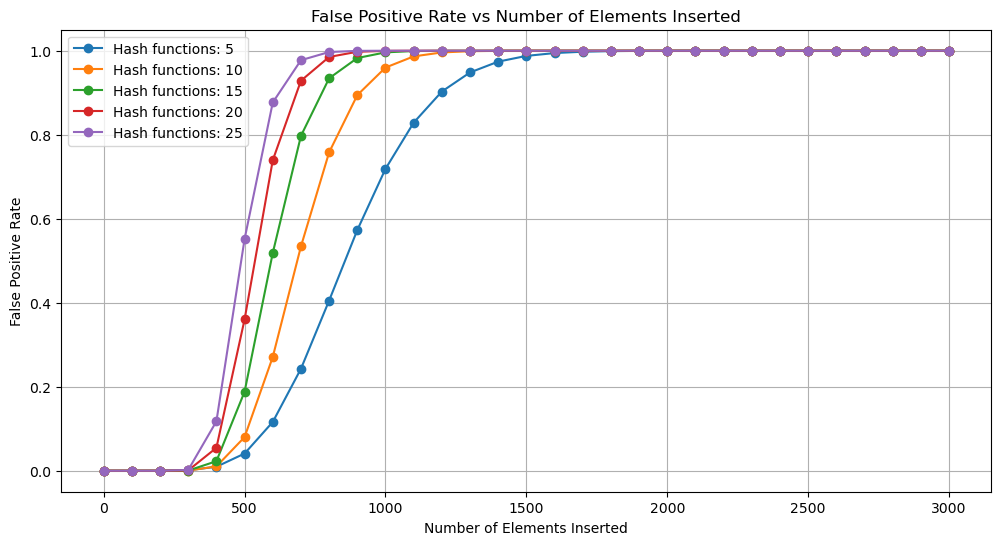

In [34]:

def benchmark_false_positive_rate(expected_n, max_n, step, hash_funcs_list, word_list):
    results = []

    word_list_extended = word_list * (max_n // len(word_list) + 1)

    for num_hashes in hash_funcs_list:
        bloom_filter = BloomFilter(expected_n * 10, num_hashes)
        current_results = {'num_inserted': [], 'false_positive_rate': [], 'num_hashes': num_hashes}

        for n in range(0, max_n + 1, step):
            insert_data = word_list_extended[:n]

            # Insert elements
            for item in insert_data:
                bloom_filter.add(item)

            # Calculate false positive rate
            false_positive_rate = bloom_filter.calculate_false_positive_rate()

            current_results['num_inserted'].append(n)
            current_results['false_positive_rate'].append(false_positive_rate)

        results.append(current_results)

    return results

def plot_results(results):
    plt.figure(figsize=(12, 6))

    for result in results:
        plt.plot(result['num_inserted'], result['false_positive_rate'], marker='o', label=f"Hash functions: {result['num_hashes']}")

    plt.xlabel('Number of Elements Inserted')
    plt.ylabel('False Positive Rate')
    plt.title('False Positive Rate vs Number of Elements Inserted')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
word_list = [str(i) for i in range(1000)]  # Dummy word list
expected_n = 1000
max_n = 3000
step = 100
hash_funcs_list = [5, 10, 15, 20, 25]  # Different numbers of hash functions to test

results = benchmark_false_positive_rate(expected_n, max_n, step, hash_funcs_list, word_list)
plot_results(results)
